<a href="https://colab.research.google.com/github/andrybrew/IHT-SEM1302-30Okt/blob/main/practice_material/social_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Social Network Analysis**

##**Importing required libraries**

In [1]:
!pip install 'networkx'

In [2]:
import requests
import pandas as pd
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
import re

##**Importing Dataset**

In [3]:
# Fetching the dataset from GitHub
data_url = "https://raw.githubusercontent.com/andrybrew/IHT-SEM1302-30Okt/main/data/001_suku-bunga.csv"

# Using pandas read_csv function to load the data from the URL directly into a DataFrame
df_tweet = pd.read_csv(data_url)

## **Building the Network Graph**

In [4]:
# Creating the edgelist
edgelist = df_tweet[['username', 'in_reply_to']].rename(columns={'username':'source', 'in_reply_to':'target'}).dropna()

# Removing rows if the target is '[]' or an empty string ''
edgelist = edgelist[~edgelist['target'].isin(['[]', ''])]

# Function to extract all usernames from a string
def extract_mentions(s):
    return re.findall(r'@[\w_]+', s)

# Apply this function to the 'target' column to obtain a list of usernames
edgelist['target'] = edgelist['target'].apply(extract_mentions)

# Separating list entries into individual rows
edgelist = edgelist.explode('target')

# Removing self-loops
edgelist = edgelist[edgelist['source'] != edgelist['target']]

# Removing rows with NaN values in the 'target' column
edgelist = edgelist.dropna(subset=['target'])

# Display the edgelist
edgelist

,source,target
0,@RenoldRinaldi,@Aswicahyono
6,@alim_amarullah,@PNS_Garis_Lucu
14,@snaim247,@SinarOnline
15,@pakmatsu,@BKTLHM
15,@pakmatsu,@kegblgnunfaedh
...,...,...
465,@arpas2000,@AnthonyBudiawan
466,@pilupobia,@PartaiSocmed
483,@arpas2000,@AnthonyBudiawan
484,@pilupobia,@PartaiSocmed


In [5]:
# Write edgelist to a CSV file
edgelist.to_csv('edgelist.csv', index=False)

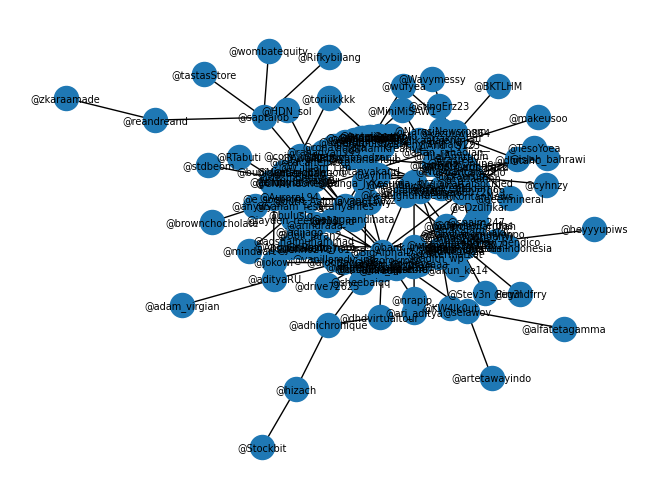

In [6]:
# Create a graph from the edgelist
G = nx.from_pandas_edgelist(edgelist, source='source', target='target')

# Visualize the graph
nx.draw(G, pos = nx.kamada_kawai_layout(G), font_size = 7, with_labels = True)

### **Network Analysis: Core Properties**

In [7]:
# Calculate number of nodes
num_nodes = G.number_of_nodes()

# Calculate number of edges
num_edges = G.number_of_edges()

# Calculate density
density = nx.density(G)

# Create a dataframe based on the results
network_properties = pd.DataFrame(data= {'num_nodes':[num_nodes],
                                 'num_edges':[num_edges],
                                 'density':[density]})
# Show network properties
network_properties

,num_nodes,num_edges,density
0,153,119,0.010234


### **Centrality Measures: Identifying Influencers**

In [8]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweeness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Calculate closeness centrality
eigenvector_centrality = nx.closeness_centrality(G)

# Create a dataframe based on the results
centralities = pd.DataFrame([degree_centrality, betweenness_centrality,
                             closeness_centrality, eigenvector_centrality]).T
centralities.columns = ['degree_centrality', 'betweenness_centrality',
                        'closeness_centrality', 'eigenvector_centrality']

# Show centralities
centralities

,degree_centrality,betweenness_centrality,closeness_centrality,eigenvector_centrality
@RenoldRinaldi,0.006579,0.0,0.006579,0.006579
@Aswicahyono,0.006579,0.0,0.006579,0.006579
@alim_amarullah,0.006579,0.0,0.006579,0.006579
@PNS_Garis_Lucu,0.006579,0.0,0.006579,0.006579
@snaim247,0.006579,0.0,0.006579,0.006579
...,...,...,...,...
@fidarnr,0.006579,0.0,0.006579,0.006579
@pilupobia,0.006579,0.0,0.006579,0.006579
@PartaiSocmed,0.006579,0.0,0.006579,0.006579
@AymanRashdanW,0.006579,0.0,0.006579,0.006579


### **Community Detection: Analyzing Modularity**

In [9]:
# Calculate the modularity
partition = community_louvain.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
partition

{'@RenoldRinaldi': 0,
 '@Aswicahyono': 0,
 '@alim_amarullah': 1,
 '@PNS_Garis_Lucu': 1,
 '@snaim247': 2,
 '@SinarOnline': 2,
 '@pakmatsu': 15,
 '@BKTLHM': 15,
 '@kegblgnunfaedh': 15,
 '@xxauruss': 4,
 '@cyhnzy': 4,
 '@ayinhet': 4,
 '@Nuswantara99': 5,
 '@Bambangmulyonoo': 5,
 '@islah_bahrawi': 5,
 '@stingErz23': 5,
 '@Bunga_JyKesuma': 5,
 '@nyaricerita': 6,
 '@dhitahc': 6,
 '@NarasiNewsroom': 6,
 '@And__S123__': 7,
 '@aeermineral': 7,
 '@makeusoo': 7,
 '@tanyakanrl': 7,
 '@Wavymessy': 7,
 '@timothyronald22': 9,
 '@ynik5': 9,
 '@ZakariaMujib': 6,
 '@rasredy': 10,
 '@hoteliercrypto': 10,
 '@HilalAmirudin': 11,
 '@tomngrh': 11,
 '@alfan_rahadian_': 12,
 '@yo2thok': 12,
 '@DwiFiki2': 13,
 '@MiniMiSAW1': 13,
 '@Nebuchanedzar_I': 13,
 '@Rheny_Prihaty29': 14,
 '@lopefutin': 14,
 '@bimo_ignatius': 15,
 '@jumalikaalajeng': 16,
 '@ronavioleta': 16,
 '@kazuuwu864': 25,
 '@wufyea': 25,
 '@discountfess': 25,
 '@Rifkybilang': 35,
 '@saptaipb': 35,
 '@1rfani': 19,
 '@AwalilRizky': 19,
 '@IlhamKreativ

###**Advanced Visualization**

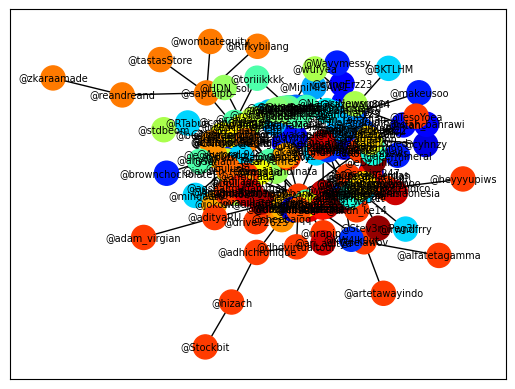

In [10]:
# Visualize the graph
nx.draw_networkx(G, pos = nx.kamada_kawai_layout(G), cmap = plt.get_cmap('jet'), node_color = values, font_size = 7, with_labels= True)

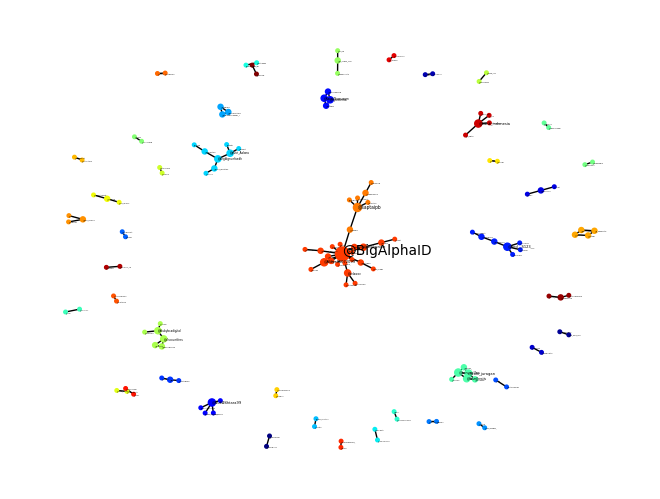

<Figure size 1500x1500 with 0 Axes>

In [11]:
# Convert degree centrality to a list of sizes for nodes
node_sizes = [degree_centrality[node] * 1000 for node in G.nodes()]

# Convert degree centrality to a list of sizes for labels
label_sizes = {node: degree_centrality[node] * 100 for node in G.nodes()}

# Draw the network with node sizes based on degree centrality
pos = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos, with_labels=False, node_size=node_sizes, cmap = plt.get_cmap('jet'), node_color = values)

# Add labels with sizes based on degree centrality
for node, (x, y) in pos.items():
    plt.text(x, y, node, fontsize=label_sizes[node])

plt.figure(figsize=(15, 15))
plt.show()